*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
import torch
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

data = pd.read_csv('insurance.csv')
data['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)
data['smoker'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
data['region'].replace(['southwest','southeast','northwest','northeast'],
                        [0, 1,2,3], inplace=True)
# data['sex'].cat.codes
# inspect data
display(data.head())
print(data.shape)

# Get data as NumPy array
data_np = data.values

# Convert the data to Torch tensor
data_tensor = torch.tensor(data_np, dtype=torch.float64)

--2022-04-27 12:03:04--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2022-04-27 12:03:04 (30.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


(1338, 7)


In [3]:
def data_normalization(data):
    # TODO: implement
    data = (data-data.min(0,keepdim = True)[0])/(data.max(0,keepdim = True)[0]-data.min(0,keepdim = True)[0])
    return data

In [4]:
data = data_normalization(data_tensor)
print(data[:,-1].size())

torch.Size([1338])


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1],data[:,-1], test_size=0.2, random_state=1)
print(X_train.size())

torch.Size([1070, 6])


In [6]:
poly = PolynomialFeatures(degree=3)
x_train = poly.fit_transform(X_train)
x_test = poly.fit_transform(X_test)
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)


In [7]:
regr = LinearRegression()
regr.fit(x_train, y_train)

def evaluate(X_test, y_test,regr):
  y_pred = regr.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  # print(regr.score(X_test, y_test))
  return mae, y_pred
  

Testing set Mean Abs Error:  0.04 expenses
You passed the challenge. Great job!


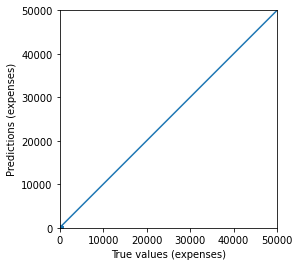

In [8]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae, y_pred = evaluate(x_test, y_test,regr)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = regr.predict(x_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
